## Example: Visualizing Seattle Bicycle Counts

As a more involved example of working with some time series data, let's take a look at bicycle counts on Seattle's [Fremont Bridge](http://www.openstreetmap.org/#map=17/47.64813/-122.34965).
This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge.
The hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the [direct link to the dataset](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k).

As of summer 2016, the CSV can be downloaded as follows:

Once this dataset is downloaded, we can use Pandas to read the CSV output into a ``DataFrame``.
We will specify that we want the Date as an index, and we want these dates to be automatically parsed:

In [3]:
import pandas as pd

In [6]:
# lee los datos en un DataFrame

# https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

df = pd.read_csv("https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD", index_col = "Date", parse_dates=True)
df.head()


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


For convenience, we'll further process this dataset by shortening the column names:

In [24]:
# que las columnas se llamen 'Total','East', 'West'
df.rename(columns={"Fremont Bridge Total": "Total", "Fremont Bridge East Sidewalk": "East", "Fremont Bridge West Sidewalk": "West"}, inplace=True)

Now let's take a look at the summary statistics for this data:

In [25]:
df.describe() 

,Total,East,West
count,90538.000000,90538.000000,90538.000000
mean,105.941837,47.374892,58.566944
std,133.581904,60.933511,82.815485
min,0.000000,0.000000,0.000000
25%,13.000000,6.000000,7.000000
50%,59.000000,27.000000,30.000000
75%,142.000000,65.000000,75.000000
max,1097.000000,698.000000,850.000000


,Total,East,West
count,87586.000000,87586.000000,87586.000000
mean,107.240849,48.086623,59.154226
std,134.790561,61.573965,83.567491
min,0.000000,0.000000,0.000000
25%,13.000000,6.000000,7.000000
50%,60.000000,27.000000,30.000000
75%,144.000000,66.000000,75.000000
max,1097.000000,698.000000,850.000000


### Visualizing the data

We can gain some insight into the dataset by visualizing it.
Let's start by plotting the raw data:

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()
import pandas.util.testing as tm

c:\Users\yporq\ds-2023\dsft_ene23\.venv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  after removing the cwd from sys.path.


In [17]:
df.columns

Index(['Fremont Bridge Total', 'Fremont Bridge East Sidewalk',
       'Fremont Bridge West Sidewalk'],
      dtype='object')

<AxesSubplot:xlabel='Date'>

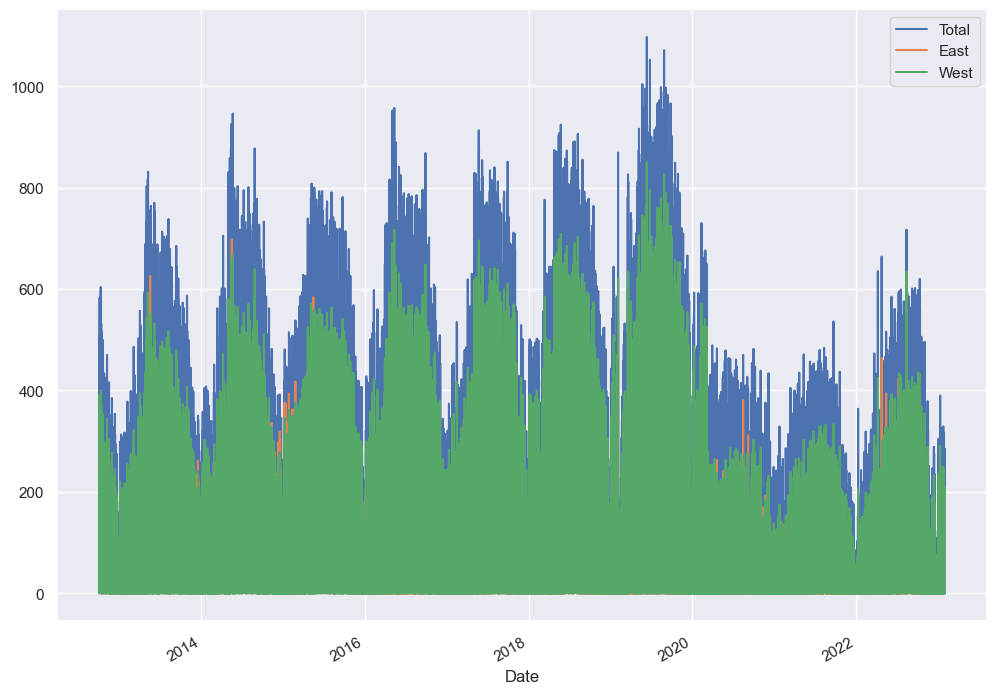

In [29]:
# haz un plot

df.plot(figsize=(12,9))

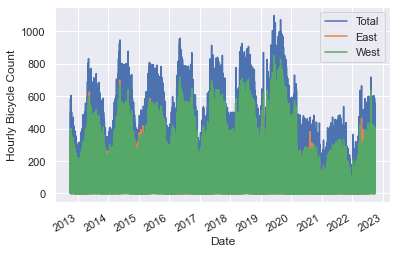

The ~25,000 hourly samples are far too dense for us to make much sense of.
We can gain more insight by resampling the data to a coarser grid.
Let's resample by month:

Text(0, 0.5, 'Monthly bicicle count')

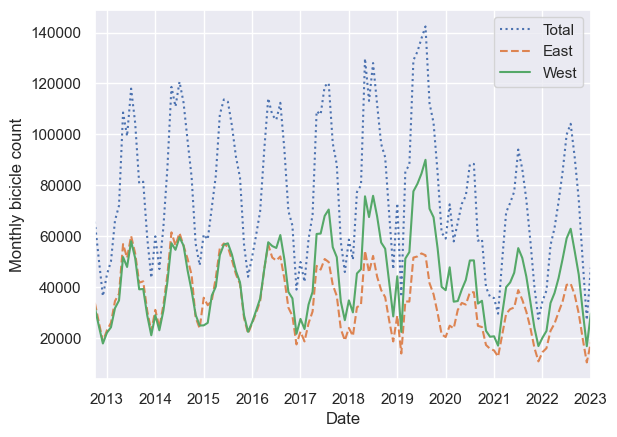

In [30]:
# muestrea por mes y en ese periodo calcula la suma
# pinta ese cálculo con puntos suspensivos para el total, rayado para el este y 
# con línea continua para el oeste
monthly = df.resample("M").sum()
monthly.plot(style=[":", "--", "-"])
plt.ylabel("Monthly bicicle count")


This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week (likely dependent on weather; see [In Depth: Linear Regression](05.06-Linear-Regression.ipynb) where we explore this further).

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the ``pd.rolling_mean()`` function.
Here we'll do a 30 day rolling mean of our data, making sure to center the window:

Text(0, 0.5, 'mean hourly sum')

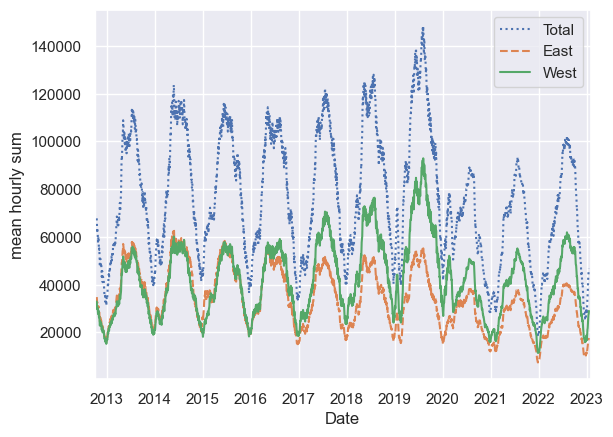

In [43]:
rolling = df.resample("D").sum()
rolling.rolling(30, center=True).sum().plot(style=[":", "--", "-"])
plt.ylabel("mean hourly sum")

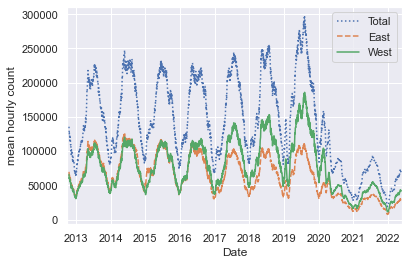

In [7]:
# haz una ventana deslizante de 30 días, calcula la suma y asóciala al centro de la ventana



The jaggedness of the result is due to the hard cutoff of the window.
We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window.
The following code specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

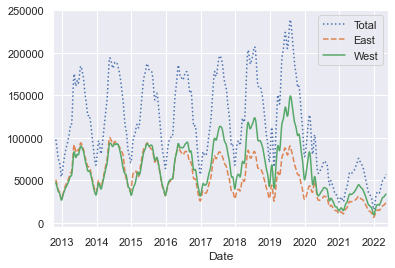

In [8]:
# usa ahora una ventana deslizante gaussiana de 50 días para suavizar más



### Digging into the data

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure.
For example, we might want to look at the average traffic as a function of the time of day.
We can do this using the GroupBy functionality discussed in [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb):

In [7]:
# agrupamos por horas y calculamos la agregación (media) calculada entre todos los días


,Total,East,West
00:00:00,10.471233,4.347123,6.124110
01:00:00,5.516712,2.414795,3.101918
02:00:00,3.609890,1.702198,1.907692
03:00:00,2.675342,1.335068,1.340274
04:00:00,6.250411,3.119726,3.130685
05:00:00,23.601644,13.752603,9.849041
06:00:00,81.357534,46.738904,34.618630
07:00:00,200.918904,120.112603,80.806301
08:00:00,283.143836,160.903562,122.240274
09:00:00,171.452727,89.241984,82.210743


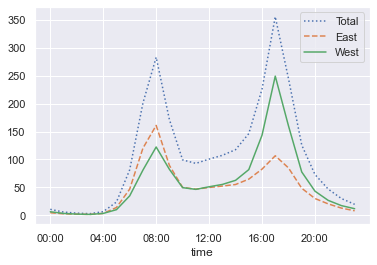

In [8]:
# mirando solo en las horas del día
# investiga qué sucede con el tráfico de bicicletas


In [10]:
# son las horas (time)


array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), ...,
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening.
This is likely evidence of a strong component of commuter traffic crossing the bridge.
This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

We also might be curious about how things change based on the day of the week. Again, we can do this with a simple groupby:

           Total       East       West
Date                                  
0     120.742642  52.826216  67.916427
1     130.522956  57.161414  73.361542
2     130.202746  57.054518  73.148228
3     123.512452  54.452347  69.060105
4     112.025387  49.554367  62.471020
5      68.714091  33.377639  35.336452
6      64.851769  32.136546  32.715223
            Total       East       West
Mon    120.742642  52.826216  67.916427
Tues   130.522956  57.161414  73.361542
Wed    130.202746  57.054518  73.148228
Thurs  123.512452  54.452347  69.060105
Fri    112.025387  49.554367  62.471020
Sat     68.714091  33.377639  35.336452
Sun     64.851769  32.136546  32.715223


<AxesSubplot:>

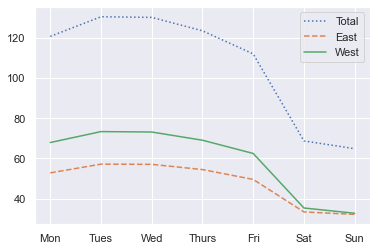

In [11]:
# agrupa ahora por día de la semana y calcula la media



This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

With this in mind, let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends.
We'll start by grouping by both a flag marking the weekend, and the time of day:

In [12]:
# investiga cómo se comprota el tráfico de biciletas según el día sea fin de semana o no y la hora


array(['Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday'], dtype='<U7')

Total        East        West
Weekday 00:00:00    8.602377    3.607362    4.995015
        01:00:00    4.259969    1.870015    2.389954
        02:00:00    2.831288    1.370782    1.460506
        03:00:00    2.450153    1.236963    1.213190
        04:00:00    7.325153    3.791411    3.533742
        05:00:00   30.173696   17.796396   12.377301
        06:00:00  107.098160   62.352761   44.745399
        07:00:00  268.212040  161.696702  106.515337
        08:00:00  372.264187  213.077071  159.187117
        09:00:00  206.254699  107.962792   98.291906
        10:00:00   96.281933   48.037975   48.243959
        11:00:00   78.062140   39.151899   38.910242
        12:00:00   82.873418   40.543537   42.329881
        13:00:00   89.030291   42.593558   46.436733
        14:00:00  101.236580   45.579755   55.656825
        15:00:00  142.759202   59.541794   83.217408
        16:00:00  259.970859   87.827071  172.143788
        17:00:00  451.908742  126.654908  325.253834
        18:00:00  307.225460  101.391871  205.833589
        19:00:00  151.231212   55.959356   95.271856
        20:00:00   85.019172   33.904141   51.115031
        21:00:00   52.917178   22.864264   30.052914
        22:00:00   32.996549   13.919862   19.076687
        23:00:00   20.595859    8.296396   12.299463
Weekend 00:00:00   15.148752    6.198656    8.950096
        01:00:00    8.662188    3.778311    4.883877
        02:00:00    5.577519    2.539729    3.037791
        03:00:00    3.238964    1.580614    1.658349
        04:00:00    3.560461    1.438580    2.121881
        05:00:00    7.152591    3.631478    3.521113
        06:00:00   16.931862    7.659309    9.272553
        07:00:00   32.492322   16.032630   16.459693
        08:00:00   60.086372   30.319578   29.766795
        09:00:00   84.380998   42.404031   41.976967
        10:00:00  105.920345   53.835893   52.084453
        11:00:00  129.815739   65.237044   64.578695
        12:00:00  144.705374   72.309981   72.395393
        13:00:00  152.873321   76.166987   76.706334
        14:00:00  158.023033   78.531670   79.491363
        15:00:00  155.063340   77.226488   77.836852
        16:00:00  140.891555   69.433781   71.457774
        17:00:00  115.225528   56.030710   59.194818
        18:00:00   88.411708   42.951056   45.460653
        19:00:00   61.975048   28.949136   33.025912
        20:00:00   42.657390   19.791747   22.865643
        21:00:00   31.242802   13.590211   17.652591
        22:00:00   21.681382    9.517274   12.164107
        23:00:00   16.502879    6.731286    9.771593

Now we'll use some of the Matplotlib tools described in [Multiple Subplots](04.08-Multiple-Subplots.ipynb) to plot two panels side by side:

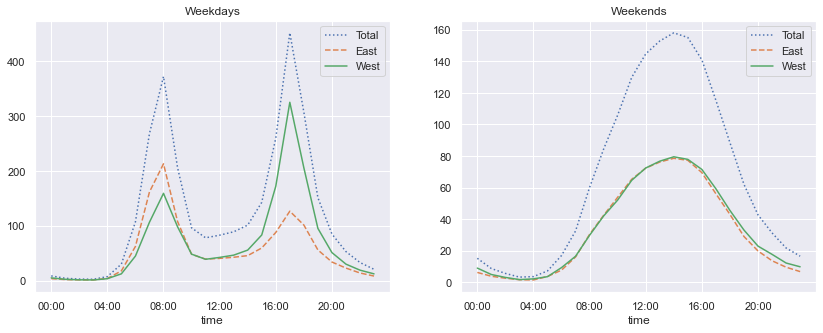

In [14]:
# pinta gráficas para ver el resultado más claro


The result is very interesting: we see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends.
It would be interesting to dig through this data in more detail, and examine the effect of weather, temperature, time of year, and other factors on people's commuting patterns; for further discussion, see my blog post ["Is Seattle Really Seeing an Uptick In Cycling?"](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/), which uses a subset of this data.
We will also revisit this dataset in the context of modeling in [In Depth: Linear Regression](05.06-Linear-Regression.ipynb).